Importing a file from the drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/My Drive/metal.00015.zip"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/My Drive/metal.00015.zip
replace metal.00015.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: metal.00015.wav         


Sample of how the Songs/MUsic will be converted into its melspectogram 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


<class 'matplotlib.collections.QuadMesh'>


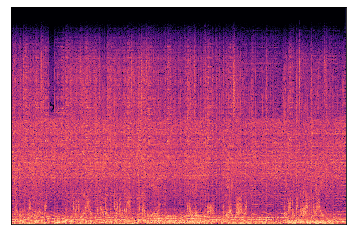

In [ ]:
import numpy as np
import librosa
import librosa.display
x,sr=librosa.load('metal.00015.wav')
import matplotlib.pyplot as plt

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(X,ref=np.max)
#plt.figure(figsize=(14, 5))
xdb=librosa.display.specshow(Xdb, sr=sr)
print(type(xdb))

Loading the training, validation and testing dataset

In [ ]:
!unzip "/content/drive/My Drive/train2.zip"
!unzip "/content/drive/My Drive/valid2.zip"
!unzip "/content/drive/My Drive/test2.zip"

Archive:  /content/drive/My Drive/train2.zip
replace music_train/blues/blues00000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: music_train/blues/blues00000.png  
  inflating: music_train/blues/blues00001.png  
  inflating: music_train/blues/blues00002.png  
  inflating: music_train/blues/blues00003.png  
  inflating: music_train/blues/blues00004.png  
  inflating: music_train/blues/blues00005.png  
  inflating: music_train/blues/blues00006.png  
  inflating: music_train/blues/blues00007.png  
  inflating: music_train/blues/blues00008.png  
  inflating: music_train/blues/blues00009.png  
  inflating: music_train/blues/blues00010.png  
  inflating: music_train/blues/blues00011.png  
  inflating: music_train/blues/blues00012.png  
  inflating: music_train/blues/blues00013.png  
  inflating: music_train/blues/blues00014.png  
  inflating: music_train/blues/blues00015.png  
  inflating: music_train/blues/blues00016.png  
  inflating: music_train/blues/blues00017.png  
  inflati

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
train=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory("music_train",target_size=(200,200))
Valid=ImageDataGenerator(rescale=1/255)
Valid_dataset=Valid.flow_from_directory("music_valid",target_size=(200,200))

Found 778 images belonging to 10 classes.
Found 150 images belonging to 10 classes.


In [ ]:
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras import regularizers
from sklearn.metrics import f1_score
#optimizer = tf.compat.v1.train.ProximalAdagradOptimizer(0.1)

VGG19 Model - 1st Model

In [ ]:
from tensorflow import keras
vgg_layers=keras.applications.vgg19.VGG19(weights='imagenet',include_top=False,input_shape=(200,200,3))

vgg_layers.summary()
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

for layer in vgg_layers.layers:
  layer.trainable=True

for layer in vgg_layers.layers:
  print(layer,layer.trainable)
 
 
model_vgg=keras.models.Sequential()
model_vgg.add(vgg_layers)
model_vgg.add(keras.layers.Flatten())
model_vgg.add(keras.layers.Dense(1024,activation='relu'))
model_vgg.add(keras.layers.Dropout(0.3))
model_vgg.add(keras.layers.Dense(768,activation='relu'))
model_vgg.add(keras.layers.Dropout(0.3))
model_vgg.add(keras.layers.Dense(256,activation='relu'))
model_vgg.add(keras.layers.Dropout(0.3))
model_vgg.add(keras.layers.Dense(10,activation='softmax'))


model_vgg.compile(optimizer=keras.optimizers.Adam(learning_rate=2e-5),
                loss='categorical_crossentropy',metrics=['Precision','accuracy','Recall'])
 
result=model_vgg.fit(train_dataset,validation_data=Valid_dataset,epochs=30)

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

Creating graphs for varous metrics

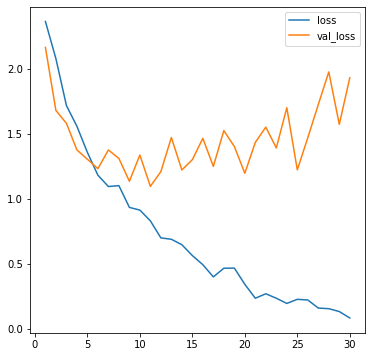

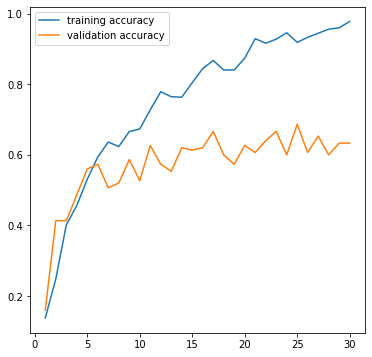

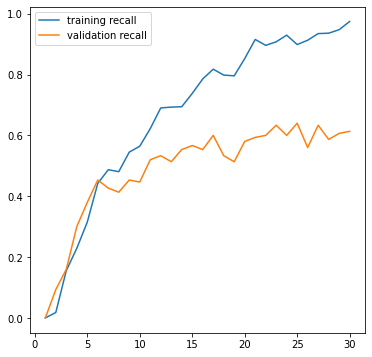

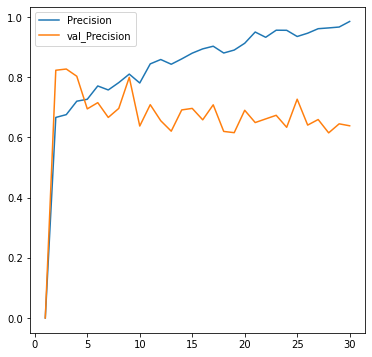

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6)) 
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,label='loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.legend()

plt.figure(figsize=(6,6))

acc=result.history['accuracy']
val_acc=result.history['val_accuracy']
plt.plot(epochs,acc,label='training accuracy')
plt.plot(epochs,val_acc,label='validation accuracy')
plt.legend()


plt.figure(figsize=(6,6))

recall=result.history['recall']
val_recall=result.history['val_recall']
plt.plot(epochs,recall,label='training recall')
plt.plot(epochs,val_recall,label='validation recall')
plt.legend()


import matplotlib.pyplot as plt
plt.figure(figsize=(6,6)) 
Precision=result.history['precision']
val_Precision=result.history['val_precision']
epochs=range(1,len(Precision)+1)
plt.plot(epochs,Precision,label='Precision')
plt.plot(epochs,val_Precision,label='val_Precision')
plt.legend()


Calculating the F1 score for the VGG model

In [ ]:
for i in range(0,len(recall)):
  if(i==len(recall)):
    last=i

F1 = (2 * (val_Precision[i] * val_recall[i])) / (val_Precision[i] + val_recall[i])
print(F1)

0.6258503491061272


Loading the test dataset 

In [ ]:
!unzip "/content/drive/My Drive/test2.zip"

Archive:  /content/drive/My Drive/test2.zip
replace music_test/blues/blues00090.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: music_test/blues/blues00090.png  
  inflating: music_test/blues/blues00093.png  
  inflating: music_test/blues/blues00094.png  
  inflating: music_test/blues/blues00095.png  
  inflating: music_test/blues/blues00096.png  
  inflating: music_test/blues/blues00097.png  
  inflating: music_test/blues/blues00098.png  
  inflating: music_test/classical/classical00090.png  
  inflating: music_test/classical/classical00091.png  
  inflating: music_test/classical/classical00092.png  
  inflating: music_test/classical/classical00093.png  
  inflating: music_test/classical/classical00094.png  
  inflating: music_test/classical/classical00095.png  
  inflating: music_test/classical/classical00098.png  
  inflating: music_test/country/country00090.png  
  inflating: music_test/country/country00092.png  
  inflating: music_test/country/country00094.png  
  inflat

In [ ]:
train_dataset.class_indices

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

Creating a mapping function to create final output in the form of numpy array to a Genre name

In [ ]:
def map(x):
  if(x==0):
    print("The music belongs to Blues genre!")
  elif(x==1):
    print("The music belongs to Classical genre!")
  elif(x==2):
    print("The music belongs to Country genre!")
  elif(x==3):
    print("The music belongs to Disco genre!")
  elif(x==4):
    print("The music belongs to Hiphop genre!")
  elif(x==5):
    print("The music belongs to Jazz genre!")
  elif(x==6):
    print("The music belongs to Metal genre!")
  elif(x==7):
    print("The music belongs to Pop genre!")
  elif(x==8):
    print("The music belongs to Reggae genre!")
  elif(x==9):
    print("The music belongs to Rock genre!")
  else:
    print("error!")

Sample test input

In [ ]:
from tensorflow.keras.preprocessing import image
img3=image.load_img("music_test/jazz/jazz00090.png",target_size=(200,200))
x=image.img_to_array(img3)
x = np.expand_dims(x, axis=0)
evl=model_vgg.predict(x)
print(evl)



[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


1.0

Obtaining the final predicted output

In [ ]:
maximum=np.max(evl)
x=np.where(evl == maximum)
my_list=list(x)
res=my_list[1]
map(res)




Training the same data on RESNET101 Model

In [ ]:
res101_layers=keras.applications.ResNet101(weights='imagenet',include_top=False,input_shape=(200,200,3),pooling='max')

res101_layers.summary()
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

for layer in res101_layers.layers:
  layer.trainable=True

for layer in res101_layers.layers:
  print(layer,layer.trainable)
 
 
model_res101=keras.models.Sequential()
model_res101.add(res101_layers)
model_res101.add(keras.layers.Flatten())
model_res101.add(keras.layers.Dense(1024,activation='relu'))
model_res101.add(keras.layers.Dropout(0.3))
model_res101.add(keras.layers.Dense(768,activation='relu'))
model_res101.add(keras.layers.Dropout(0.3))
model_res101.add(keras.layers.Dense(256,activation='relu'))
model_res101.add(keras.layers.Dropout(0.3))
model_res101.add(keras.layers.Dense(10,activation='softmax'))

model_res101.compile(optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
                loss='categorical_crossentropy',metrics=['accuracy','Precision','Recall'])
 
result_res101=model_res101.fit(train_dataset,validation_data=Valid_dataset,epochs=30)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6)) 
loss1=result_res101.history['loss']
val_loss1=result_res101.history['val_loss']
epochs=range(1,len(loss1)+1)
plt.plot(epochs,loss1,label='loss')
plt.plot(epochs,val_loss1,label='val_loss')
plt.legend()


plt.figure(figsize=(6,6))

acc1=result_res101.history['accuracy']
val_acc1=result_res101.history['val_accuracy']
plt.plot(epochs,acc1,label='training accuracy')
plt.plot(epochs,val_acc1,label='validation accuracy')
plt.legend()


plt.figure(figsize=(6,6))

recall1=result_res101.history['recall']
val_recall1=result_res101.history['val_recall']
plt.plot(epochs,recall1,label='training recall')
plt.plot(epochs,val_recall1,label='validation recall')
plt.legend()


import matplotlib.pyplot as plt
plt.figure(figsize=(6,6)) 
Precision1=result_res101.history['precision']
val_Precision1=result_res101.history['val_precision']
epochs=range(1,len(Precision1)+1)
plt.plot(epochs,Precision1,label='Precision')
plt.plot(epochs,val_Precision1,label='val_Precision')
plt.legend()

In [ ]:
for i in range(0,len(recall1)):
  if(i==len(recall1)):
    last=i

F1 = (2 * (Precision1[i] * recall1[i])) / (Precision1[i] + recall1[i])
print(F1)

Training the Dataset on RESNET50 model

In [ ]:
resnet=keras.applications.ResNet50(weights='imagenet',include_top=False,input_shape=(200,200,3))

resnet.summary()
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

for layer in resnet.layers:
  layer.trainable=True

for layer in resnet.layers:
  print(layer,layer.trainable)
 
 
resnet_model=keras.models.Sequential()
resnet_model.add(resnet)
resnet_model.add(keras.layers.Flatten())
resnet_model.add(keras.layers.Dense(1024,activation='relu'))
resnet_model.add(keras.layers.Dropout(0.3))
resnet_model.add(keras.layers.Dense(768,activation='relu'))
resnet_model.add(keras.layers.Dropout(0.3))
resnet_model.add(keras.layers.Dense(256,activation='relu'))
resnet_model.add(keras.layers.Dropout(0.3))
resnet_model.add(keras.layers.Dense(10,activation='softmax'))

resnet_model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
                loss='categorical_crossentropy',metrics=['accuracy','Precision','Recall'])
result_resnet=resnet_model.fit(train_dataset,validation_data=Valid_dataset,epochs=30)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6)) 
loss3=result_resnet.history['loss']
val_loss3=result_resnet.history['val_loss']
epochs=range(1,len(loss3)+1)
plt.plot(epochs,loss3,label='loss')
plt.plot(epochs,val_loss3,label='val_loss')
plt.legend()

plt.figure(figsize=(6,6))

acc3=result_resnet.history['accuracy']
val_acc3=result_resnet.history['val_accuracy']
plt.plot(epochs,acc3,label='training accuracy')
plt.plot(epochs,val_acc3,label='validation accuracy')
plt.legend()


plt.figure(figsize=(6,6))

recall3=result_resnet.history['recall']
val_recall3=result_resnet.history['val_recall']
plt.plot(epochs,recall3,label='training recall')
plt.plot(epochs,val_recall3,label='validation recall')
plt.legend()


import matplotlib.pyplot as plt
plt.figure(figsize=(6,6)) 
Precision3=result_resnet.history['precision']
val_Precision3=result_resnet.history['val_precision']
epochs=range(1,len(Precision3)+1)
plt.plot(epochs,Precision3,label='Precision')
plt.plot(epochs,val_Precision3,label='val_Precision')
plt.legend()

In [ ]:
for i in range(0,len(recall3)):
  if(i==len(recall3)):
    last=i

F1 = 2 * (Precision3[i] * recall3[i]) / (Precision3[i] + recall3[i])
print(F1)

PLotting the F1 score graph of all the 3 models

In [ ]:
x=['vgg','resnet_101','resnet50']
y=[.64,.94,.98]
plt.bar(x,y,)